In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import matplotlib.transforms as transforms
import matplotlib
import pandas as pd
import os
import os.path
from scipy.optimize import curve_fit
from groupBMC.groupBMC import GroupBMC


In [6]:
dname = os.path.dirname(os.getcwd())
dname

'c:\\Users\\Jirko\\Desktop\\Hip_Lab\\analysis_scripts'

In [13]:
df = pd.read_csv(dname + "/part_level_analysis/params_trialwise_crossval/participantwise_log_likelihood.csv")
df.rename(columns={ df.columns[0]: "ID" }, inplace = True)
df.head(6)

,ID,sigmoid,linear,relu,linear_step
0,0,7.491478,3.465333,3.465333,8.800111
1,1,3.567308,7.362483,7.362483,14.351252
2,2,15.811235,1.525848,1.525848,9.932590
3,3,6.723197,4.696493,4.696493,10.463527
4,4,11.499478,2.322172,2.322172,6.498756
5,5,6.154761,1.074609,1.074609,7.139552


In [19]:
data = df.to_numpy()
L = data[:,1:].T

L

array([[ 7.49147838,  3.5673076 , 15.81123478,  6.72319733, 11.49947807,
         6.15476052, 12.66401983,  2.2212755 ,  7.9034067 ,  9.77876469,
         0.70796361, 20.95956167,  1.01592769,  7.29234906, 12.03873644,
        10.50670684,  7.57109145, 21.57595601,  5.3739571 ,  7.79468142,
        16.61319111,  7.2177106 ,  9.80817719,  7.86586524,  9.20425214,
        16.07644079,  8.11144526, 15.01411282,  6.95005603,  2.43872424,
        14.57483238,  7.88095129, 17.69675539, 14.09623759, 13.56949163,
         6.33573783,  5.16012917, 11.57592581, 11.02549058,  9.20846215,
        16.12581152, 18.19320707,  7.94776129, 12.46852722,  1.4895905 ,
         3.21398521,  7.75176581, 13.05379255,  7.44248713],
       [ 3.46533316,  7.36248331,  1.52584814,  4.6964934 ,  2.32217208,
         1.07460925,  3.57963641,  5.69908376,  3.71338956,  7.41602483,
         0.73525622,  8.17823106,  1.56187917,  2.15273448,  3.46628062,
         5.2910977 ,  7.326119  ,  6.04578705,  0.78965855,  3.

In [20]:
result = GroupBMC(L).get_result()

In [21]:

print('       ' + ' '.join([f'subj{j+1}' for j in range(L.shape[1])]))
for i in range(L.shape[0]):
    print(f'model{i+1} ' + ' '.join(map(lambda f: f'{f:.3f}', result.attribution[i])))

       subj1 subj2 subj3 subj4 subj5 subj6 subj7 subj8 subj9 subj10 subj11 subj12 subj13 subj14 subj15 subj16 subj17 subj18 subj19 subj20 subj21 subj22 subj23 subj24 subj25 subj26 subj27 subj28 subj29 subj30 subj31 subj32 subj33 subj34 subj35 subj36 subj37 subj38 subj39 subj40 subj41 subj42 subj43 subj44 subj45 subj46 subj47 subj48 subj49
model1 0.102 0.000 0.993 0.010 0.984 0.136 0.861 0.000 0.028 0.001 0.002 0.865 0.009 0.035 0.964 0.000 0.000 0.831 0.951 0.002 0.007 0.972 0.842 0.013 0.964 0.016 0.004 0.003 0.250 0.000 0.055 0.036 0.993 0.618 0.907 0.128 0.007 0.232 0.000 0.998 0.012 0.427 0.294 0.000 0.003 0.000 0.068 0.001 0.007
model2 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
model3 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.

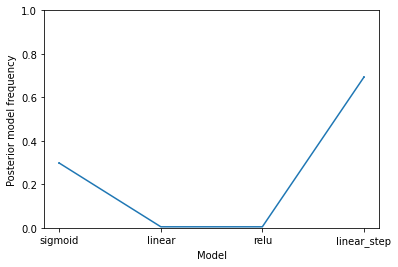

In [25]:
_, ax = plt.subplots()
ax.errorbar(np.arange(len(L)), result.frequency_mean, result.frequency_var)
ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["sigmoid", "linear", "relu", "linear_step"])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Posterior model frequency')
plt.show()

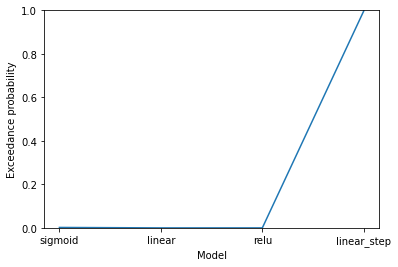

In [26]:
_, ax = plt.subplots()
ax.plot(np.arange(len(L)), result.exceedance_probability)
ax.set_xticks([0, 1, 2,3])
ax.set_xticklabels(["sigmoid", "linear", "relu", "linear_step"])
ax.set_xlabel('Model')
ax.set_ylim(0, 1)
ax.set_ylabel('Exceedance probability')
plt.show()